<a href="https://colab.research.google.com/github/parthrjpt/EAS555_Projects/blob/main/PS4_555.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1


## Part B

[1] Let us consider the problem of predicting a single continuous target variable t from a vector x of inputs. 
</br>Assuming that the conditional distribution p(t|x) is Gaussian, with an x-dependent mean given by the output of a neural network model y(x,w), and with precision
(inverse variance) β:</br>
$$p(D|w;\beta) = \prod_{n=1}^N N(t_n|y(x_nw),\beta^{-1})$$


Based on the concept of Bayes' Theorem the posterior probability  to the above equation can be given as:</br>
$$p(w|D,\alpha ,\beta) \propto{p(w|\alpha)p(D|w,\beta)}$$




The Gaussian Approximation to thi can be given with the help of Laplacian transformation. This can be done by maximizing the posterior which is given by:</br>

$$ ln p(w|d) = - \frac{\alpha}{2}w^Tw - \frac{\beta}{2} \sum_{n=1}^N \{y(x_n,w) - t_n \}^2 + const  $$


# Task 2

### Initial Setup

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from keras.callbacks import LambdaCallback


In [ ]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
print(X.shape, y.shape,X_test.shape, y_test.shape)
#y_train =y
#X_train = X.reshape((X.shape[0], 28, 28, 1))
#X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


# !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

# !gzip -d train-images-idx3-ubyte.gz
# !gzip -d train-labels-idx1-ubyte.gz
# !gzip -d t10k-images-idx3-ubyte.gz
# !gzip -d t10k-labels-idx1-ubyte.gz

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
def get_Data(X,y):
  X_data=[]
  y_data=[]
  labels= [0,1,2,3,4,5,6,7,8,9]
  for ele in labels:
    counter=0
    for i in range(len(X)):
      if(counter<100):
        if(y[i]==ele):
          X_data.append(X[i])
          y_data.append(y[i])
          counter+=1
  return (X_data,y_data)

X_raw,y_raw = get_Data(X,y)


In [ ]:
X_test_raw,y_test_raw = get_Data(X_test,y_test)


In [ ]:
X_train = np.array(X_raw)
y_train = np.array(y_raw)
X_test = np.array(X_test_raw)
y_test = np.array(y_test_raw)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1000, 28, 28) (1000,) (1000, 28, 28) (1000,)


### Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
from keras import regularizers


In [ ]:
# 1 layer without regularization
def Task2_Modela():
  model = Sequential()
  #inputShape = (28,28,1)
  model.add(Dense(30, activation='sigmoid'))         
  model.add(Dense(10, activation="softmax"))    
  
  model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
                     
  return model

In [ ]:
# 1 layer with regularization
def Task2_Modelb1():
  model = Sequential()
  #inputShape = (28,28,1)
  regularize=5
  model.add(Dense(30, activation='sigmoid', kernel_regularizer = regularizers.l2(regularize))) 
  model.add(Dense(10, activation="softmax"))      
  model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
  return model  

In [ ]:
# 2 layer without regularization
def Task2_Modelb2():
  model = Sequential()
  #inputShape = (28,28,1)
  regularize=5
  model.add(Dense(30, activation='sigmoid'))
  model.add(Dense(30, activation='sigmoid' ))                  
  model.add(Dense(10, activation="softmax"))
  model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# 2 layer with regularization
def Task2_Modelb3():
  model = Sequential()
  #inputShape = (28,28,1)
  regularize=5
  model.add(Dense(30, activation='sigmoid',kernel_regularizer = regularizers.l2(regularize)))
  model.add(Dense(30, activation='sigmoid',kernel_regularizer = regularizers.l2(regularize)))                  
  model.add(Dense(10, activation="softmax"))
  model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
4# 3 layer without regularization
def Task2_Modelb4():
  model = Sequential()
  #inputShape = (28,28,1)
  regularize=5
  model.add(Dense(30, activation='sigmoid'))         
  model.add(Dense(30, activation='sigmoid'))         
  model.add(Dense(30, activation='sigmoid'))         
  model.add(Dense(10, activation="softmax"))
  model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# 3 layer with regularization
def Task2_Modelb5():
  model = Sequential()
  #inputShape = (28,28,1)
  regularize=5
  model.add(Dense(30, activation='sigmoid',kernel_regularizer = regularizers.l2(regularize)))         
  model.add(Dense(30, activation='sigmoid',kernel_regularizer = regularizers.l2(regularize)))         
  model.add(Dense(30, activation='sigmoid',kernel_regularizer = regularizers.l2(regularize)))         
  model.add(Dense(10, activation="softmax"))
  model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def calc_learning_speed(weights):
  previous = 0
  speed = []

  for ind, item in enumerate(weights):
      #print(ind,item)
      weights[ind] = np.mean(np.mean(weights[ind]))

  for ele in weights:
      diff = (ele - previous)
      speed.append(diff)
      previouz = ele
      
  speed = np.array(speed)/np.sum(weights)
  
  return speed

In [ ]:
modelt1a1 = Task2_Modela()
modelt2b1 = Task2_Modelb1()
modelt2b2 = Task2_Modelb2()
modelt2b3 = Task2_Modelb3()
modelt2b4 = Task2_Modelb4()
modelt2b5 = Task2_Modelb5()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], (28**2))
X_test = X_test.reshape(X_test.shape[0], (28**2))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)


(1000, 784) (1000, 784) (1000, 10) (1000, 10)


In [ ]:
layer_weights = []
weights = LambdaCallback(on_epoch_end=lambda epochs, logs: layer_weights.append(modelt1a1.layers[0].get_weights()))

history_t1a1 = modelt1a1.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test,y_test),
    callbacks=[weights])
lerningspeed_t1a1 = calc_learning_speed(np.array(layer_weights))
loss_t1a1, accuracy_t1a1= modelt1a1.evaluate(
    X_test,
    y_test,
    batch_size=10)


Epoch 1/30
100/100 [==============================] - 4s 7ms/step - loss: 1.8282 - accuracy: 0.3793 - val_loss: 1.1935 - val_accuracy: 0.5960
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.8318 - accuracy: 0.7363 - val_loss: 1.1642 - val_accuracy: 0.6330
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.7383 - val_loss: 1.0743 - val_accuracy: 0.6650
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.7975 - val_loss: 1.0258 - val_accuracy: 0.6560
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.7517 - accuracy: 0.7695 - val_loss: 1.4095 - val_accuracy: 0.6210
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.7284 - accuracy: 0.7777 - val_loss: 1.0108 - val_accuracy: 0.7240
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.8348 - val_loss: 1.0026 - val_accuracy: 0.7140
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


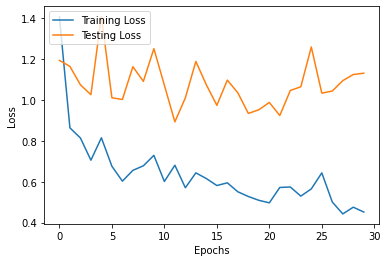

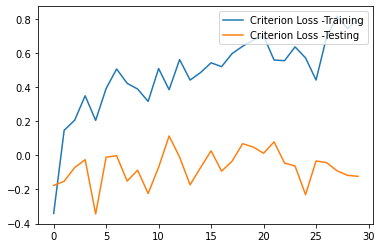

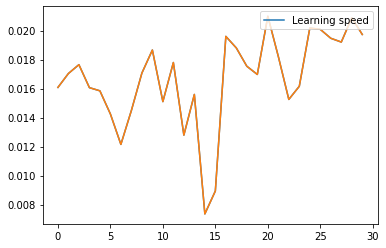

In [ ]:
plt.figure()
plt.plot(history_t1a1.history['loss'])
plt.plot(history_t1a1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper left')

plt.figure()
plt.plot(-np.log(history_t1a1.history['loss']))
plt.plot(-np.log(history_t1a1.history['val_loss']))
plt.legend(['Criterion Loss -Training','Criterion Loss -Testing'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(lerningspeed_t1a1)
plt.legend(['Learning speed'], loc = 'upper right')
plt.show()



In [ ]:
print('Loss: ',loss_t1a1,'Accuracy: ',accuracy_t1a1)

Loss:  1.1309528350830078 Accuracy:  0.7229999899864197


In [ ]:
layer_weights = []
weights = LambdaCallback(on_epoch_end=lambda epochs, logs: layer_weights.append(modelt2b1.layers[0].get_weights()))

history_t2b1 = modelt2b1.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test,y_test),
    callbacks=[weights])
lerningspeed_t2b1 = calc_learning_speed(np.array(layer_weights))
loss_t2b1, accuracy_t2b1= modelt2b1.evaluate(
    X_test,
    y_test,
    batch_size=10)


Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 86.6747 - accuracy: 0.0869 - val_loss: 2.3918 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3871 - accuracy: 0.0783 - val_loss: 2.3206 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3482 - accuracy: 0.1005 - val_loss: 2.3153 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3243 - accuracy: 0.0985 - val_loss: 2.3405 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3408 - accuracy: 0.0945 - val_loss: 2.3152 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3240 - accuracy: 0.0897 - val_loss: 2.3253 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3259 - accuracy: 0.1053 - val_loss: 2.3166 - val_accuracy: 0.1000
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


100/100 [==============================] - 0s 2ms/step - loss: 3.4032 - accuracy: 0.1000


In [ ]:
print('Loss: ',loss_t2b1,'Accuracy: ',accuracy_t2b1)

Loss:  3.403217077255249 Accuracy:  0.10000000149011612


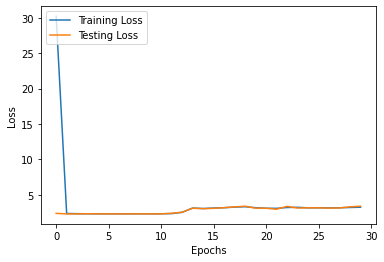

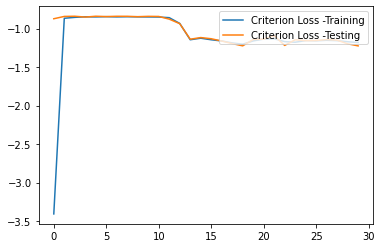

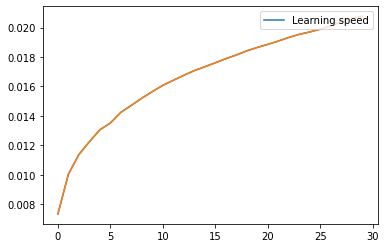

In [ ]:
plt.figure()
plt.plot(history_t2b1.history['loss'])
plt.plot(history_t2b1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper left')

plt.figure()
plt.plot(-np.log(history_t2b1.history['loss']))
plt.plot(-np.log(history_t2b1.history['val_loss']))
plt.legend(['Criterion Loss -Training','Criterion Loss -Testing'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(lerningspeed_t2b1)
plt.legend(['Learning speed'], loc = 'upper right')
plt.show()


In [ ]:
layer_weights = []
weights = LambdaCallback(on_epoch_end=lambda epochs, logs: layer_weights.append(modelt2b2.layers[0].get_weights()))

history_t2b2 = modelt2b2.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test,y_test),
    callbacks=[weights])
lerningspeed_t2b2 = calc_learning_speed(np.array(layer_weights))
loss_t2b2, accuracy_t2b2= modelt2b2.evaluate(
    X_test,
    y_test,
    batch_size=10)


Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 2.0293 - accuracy: 0.2745 - val_loss: 1.4926 - val_accuracy: 0.4410
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 1.2291 - accuracy: 0.5211 - val_loss: 1.4952 - val_accuracy: 0.4930
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 1.0531 - accuracy: 0.6528 - val_loss: 1.2447 - val_accuracy: 0.6190
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.8379 - accuracy: 0.7580 - val_loss: 1.1320 - val_accuracy: 0.5650
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.9457 - accuracy: 0.6592 - val_loss: 1.4146 - val_accuracy: 0.5470
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.8936 - accuracy: 0.7068 - val_loss: 1.1125 - val_accuracy: 0.6620
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.8558 - accuracy: 0.7442 - val_loss: 1.0127 - val_accuracy: 0.6640
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


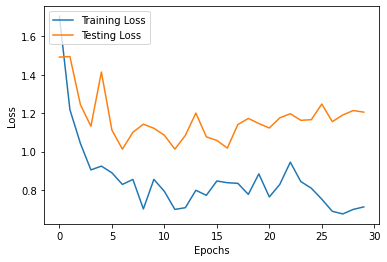

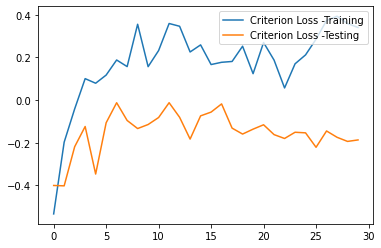

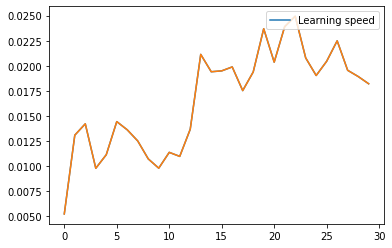

In [ ]:
plt.figure()
plt.plot(history_t2b2.history['loss'])
plt.plot(history_t2b2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper left')

plt.figure()
plt.plot(-np.log(history_t2b2.history['loss']))
plt.plot(-np.log(history_t2b2.history['val_loss']))
plt.legend(['Criterion Loss -Training','Criterion Loss -Testing'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(lerningspeed_t2b2)
plt.legend(['Learning speed'], loc = 'upper right')
plt.show()


In [ ]:
print('Loss: ',loss_t2b2,'Accuracy: ',accuracy_t2b2)

Loss:  1.2055397033691406 Accuracy:  0.6990000009536743


In [ ]:
layer_weights = []
weights = LambdaCallback(on_epoch_end=lambda epochs, logs: layer_weights.append(modelt2b3.layers[0].get_weights()))

history_t2b3 = modelt2b3.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test,y_test),
    callbacks=[weights])
lerningspeed_t2b3 = calc_learning_speed(np.array(layer_weights))
loss_t2b3, accuracy_t2b3= modelt2b3.evaluate(
    X_test,
    y_test,
    batch_size=10)

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 104.4532 - accuracy: 0.1043 - val_loss: 2.3345 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3342 - accuracy: 0.1168 - val_loss: 2.3140 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3299 - accuracy: 0.1125 - val_loss: 2.3197 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3292 - accuracy: 0.0955 - val_loss: 2.3185 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3235 - accuracy: 0.0865 - val_loss: 2.3090 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3297 - accuracy: 0.0907 - val_loss: 2.3387 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3290 - accuracy: 0.0931 - val_loss: 2.3209 - val_accuracy: 0.1000
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


100/100 [==============================] - 0s 2ms/step - loss: 3.4684 - accuracy: 0.1000


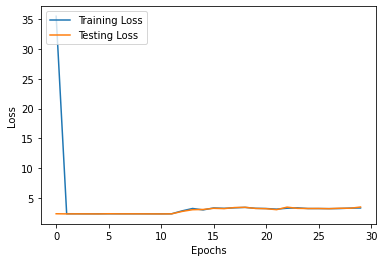

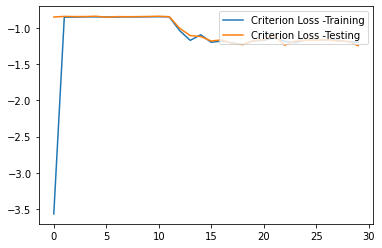

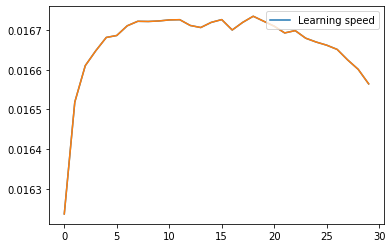

In [ ]:
plt.figure()
plt.plot(history_t2b3.history['loss'])
plt.plot(history_t2b3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper left')

plt.figure()
plt.plot(-np.log(history_t2b3.history['loss']))
plt.plot(-np.log(history_t2b3.history['val_loss']))
plt.legend(['Criterion Loss -Training','Criterion Loss -Testing'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(lerningspeed_t2b3)
plt.legend(['Learning speed'], loc = 'upper right')
plt.show()


In [ ]:
print('Loss: ',loss_t2b3,'Accuracy: ',accuracy_t2b3)

Loss:  3.4684255123138428 Accuracy:  0.10000000149011612


In [ ]:
layer_weights = []
weights = LambdaCallback(on_epoch_end=lambda epochs, logs: layer_weights.append(modelt2b4.layers[0].get_weights()))

history_t2b4 = modelt2b4.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test,y_test),
    callbacks=[weights])
lerningspeed_t2b4 = calc_learning_speed(np.array(layer_weights))
loss_t2b4, accuracy_t2b4= modelt2b4.evaluate(
    X_test,
    y_test,
    batch_size=10)

Epoch 1/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3289 - accuracy: 0.0920 - val_loss: 2.3109 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3264 - accuracy: 0.1000 - val_loss: 2.3179 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3294 - accuracy: 0.0880 - val_loss: 2.3437 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3320 - accuracy: 0.1040 - val_loss: 2.3365 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 2.3289 - accuracy: 0.0850 - val_loss: 2.3261 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3243 - accuracy: 0.0870 - val_loss: 2.3258 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3217 - accuracy: 0.0940 - val_loss: 2.3380 - val_accuracy: 0.1000
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


100/100 [==============================] - 0s 2ms/step - loss: 2.3303 - accuracy: 0.1000


In [ ]:
print('Loss: ',loss_t2b4,'Accuracy: ',accuracy_t2b4)

Loss:  2.323810338973999 Accuracy:  0.10000000149011612


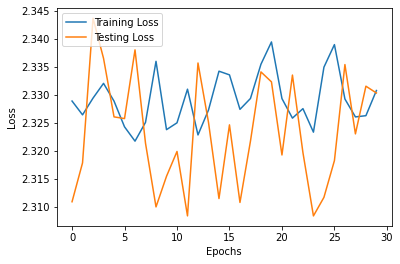

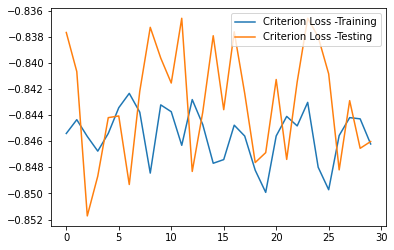

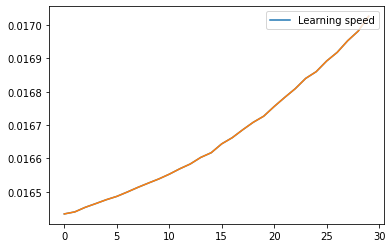

In [ ]:
plt.figure()
plt.plot(history_t2b4.history['loss'])
plt.plot(history_t2b4.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper left')

plt.figure()
plt.plot(-np.log(history_t2b4.history['loss']))
plt.plot(-np.log(history_t2b4.history['val_loss']))
plt.legend(['Criterion Loss -Training','Criterion Loss -Testing'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(lerningspeed_t2b4)
plt.legend(['Learning speed'], loc = 'upper right')
plt.show()


In [ ]:
layer_weights = []
weights = LambdaCallback(on_epoch_end=lambda epochs, logs: layer_weights.append(modelt2b5.layers[0].get_weights()))

history_t2b5 = modelt2b5.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test,y_test),
    callbacks=[weights])
lerningspeed_t2b5 = calc_learning_speed(np.array(layer_weights))
loss_t2b5, accuracy_t2b5= modelt2b5.evaluate(
    X_test,
    y_test,
    batch_size=10)

Epoch 1/30
100/100 [==============================] - 0s 4ms/step - loss: 3.4885 - accuracy: 0.0950 - val_loss: 3.3440 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 3.4171 - accuracy: 0.0860 - val_loss: 3.4137 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 3.2776 - accuracy: 0.0930 - val_loss: 3.1986 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 3.1921 - accuracy: 0.1010 - val_loss: 3.1852 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 3.2439 - accuracy: 0.0820 - val_loss: 3.2704 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 3.2670 - accuracy: 0.0880 - val_loss: 3.3021 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 3.4026 - accuracy: 0.0910 - val_loss: 3.5284 - val_accuracy: 0.1000
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


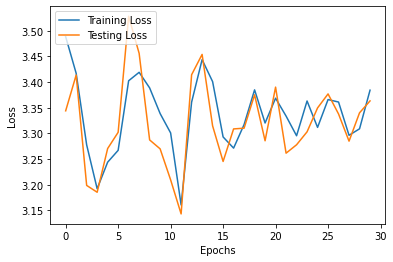

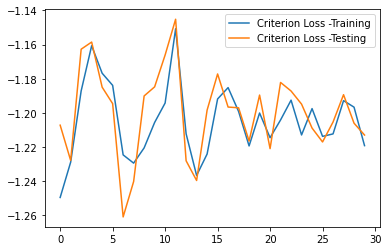

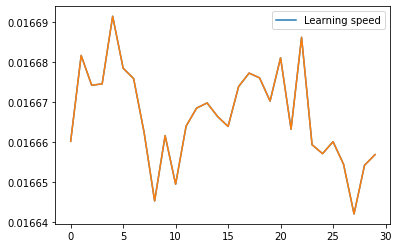

In [ ]:
plt.figure()
plt.plot(history_t2b5.history['loss'])
plt.plot(history_t2b5.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper left')

plt.figure()
plt.plot(-np.log(history_t2b5.history['loss']))
plt.plot(-np.log(history_t2b5.history['val_loss']))
plt.legend(['Criterion Loss -Training','Criterion Loss -Testing'], loc = 'upper right')
plt.show()

plt.figure()
plt.plot(lerningspeed_t2b5)
plt.legend(['Learning speed'], loc = 'upper right')
plt.show()


In [ ]:
print('Loss: ',loss_t2b5,'Accuracy: ',accuracy_t2b5)

Loss:  3.3633251190185547 Accuracy:  0.10000000149011612


# Task 2(c)

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train,y_train = get_Data(X_train,y_train)
X_test,y_test = get_Data(X_test,y_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


def create_convolution_model(isdropout):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), activation='sigmoid', input_shape = (28,28,1)))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  if isdropout:
    model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='sigmoid')) 
  if isdropout:
    model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.1), metrics=['accuracy'])
  return model

In [ ]:
modelt2c1= create_convolution_model(False)
history_t2c1 = modelt2c1.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test,y_test))

loss_t2c1, accuracy_t2c1= modelt2c1.evaluate(
    X_test,
    y_test,
    batch_size=10)


Epoch 1/30
100/100 [==============================] - 30s 6ms/step - loss: 5.7366 - accuracy: 0.1060 - val_loss: 3.5249 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 3.3133 - accuracy: 0.0891 - val_loss: 3.2172 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 3.4118 - accuracy: 0.1097 - val_loss: 3.4027 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 3.4104 - accuracy: 0.0889 - val_loss: 2.7189 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 3.1663 - accuracy: 0.1119 - val_loss: 3.8290 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 3.5856 - accuracy: 0.0900 - val_loss: 2.6380 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 3.7188 - accuracy: 0.1102 - val_loss: 3.1491 - val_accuracy: 0.1000
Epoch

In [ ]:
print('Loss: ',loss_t2c1,'Accuracy: ',accuracy_t2c1)

Loss:  2.897214412689209 Accuracy:  0.10000000149011612


In [ ]:
modelt2c2= create_convolution_model(True)
history_t2c2 = modelt2c2.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test,y_test))

loss_t2c2, accuracy_t2c2 = modelt2c2.evaluate(
    X_test,
    y_test,
    batch_size=10)


Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 6.5823 - accuracy: 0.1222 - val_loss: 3.7391 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 1s 5ms/step - loss: 5.4830 - accuracy: 0.0747 - val_loss: 3.4500 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 5.0404 - accuracy: 0.1016 - val_loss: 4.4348 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 4.9230 - accuracy: 0.0923 - val_loss: 3.2947 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 5.0868 - accuracy: 0.1245 - val_loss: 4.1808 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 5.0561 - accuracy: 0.1192 - val_loss: 4.5080 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 5.1501 - accuracy: 0.1046 - val_loss: 3.8587 - val_accuracy: 0.1000
Epoch 

In [ ]:
print('Loss: ',loss_t2c2,'Accuracy: ',accuracy_t2c2)

Loss:  4.467508792877197 Accuracy:  0.10000000149011612


### Image Augmentation

In [ ]:
# define data preparation
datagen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=2,
            width_shift_range=3,
            height_shift_range=3,
            horizontal_flip=True
        )
# fit parameters from data
datagen.fit(X_train)
# modelt2c2= create_convolution_model(True)
# # configure batch size and retrieve one batch of images
# for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# 	for i in range(0, 9):
#     history_t2c2 = modelt2c2.fit(X_batch,y_batch,epochs=30,batch_size=10,validation_data=(X_test,y_test))
# 	break

# 
modelt2c2.fit(datagen.flow(X_train, y_train, batch_size=10),
          steps_per_epoch=len(X_train) / 10, epochs=30)

loss_t2c2, accuracy_t2c2 = modelt2c2.evaluate(
     X_test,
     y_test,
     batch_size=10)

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 5.7722 - accuracy: 0.0980
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 5.2967 - accuracy: 0.1020
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 5.6001 - accuracy: 0.0930
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 5.4213 - accuracy: 0.1060
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 5.2679 - accuracy: 0.1090
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 4.8984 - accuracy: 0.0910
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 5.4008 - accuracy: 0.1050
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 4.5984 - accuracy: 0.0890
Epoch 9/30
100/100 [==============================] - 1s 6ms/step - loss: 5.2259 - accuracy: 0.1200
Epoch 10/30
100/100 [==============================] - 1s 6ms/step - loss: 5.1076 - accuracy: 0.1030

In [ ]:

print('Loss: ',loss_t2c2,'Accuracy: ',accuracy_t2c2)

Loss:  5.156999588012695 Accuracy:  0.10000000149011612


# References:

[1] Bishop, Christopher M. (2006). Pattern recognition and machine learning. New York :Springer,

Tensorflow documentation (https://www.tensorflow.org/datasets/keras_example)